# Game Analysis

You work in the online store "Ice" which sells video games from all over the world. Data regarding user and expert reviews games, genres, platforms (e.g. Xbox or PlayStation), and historical sales data games are available from open sources. You need to identify the patterns that determine whether a game can be said to be successful or not. That way, you can find games which have the most potential and plan their advertising campaigns.

In front of you is data from 2016. Let's imagine that it is December 2016 and you are planning a campaign for 2017.

Dataset this contains abbreviations. ESRB stands for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and gives an age rating such as Teen or Adult.

<b>Objective:</b>

   1. Identify the patterns that determine whether a game can be said to be successful or not.
   2. Finding the games with the most potential and planning their ad campaigns.
   
<b>Hypothesis:</b>
   1. The average user rating for the Xbox One and PC platforms is the same.
   2. The average user rating for Action and Sports genre.

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
2. [Data Pre-processing](#Pre-processing)
    - [Column naming](#col)
    - [Missing values](#missing)
    - [Data type](#type)
    - [Check columns](#check)
    - [Total sales](#total)
3. [*Exploratory Data Analysis*](#EDA)
    - [Number of games released in different years](#1)
    - [Variation of sales from platform to platform](#2)
    - [Sales per platform since 2013](#3)
    - [Profit potential on the platform](#4)
    - [Influence of reviews on platform sales](#5)
    - [Most profitable genre](#6)
    - [User profile of each area](#7)
4. [Hypothesis Test](#Test)
    - [Average user rating for Xbox One and PC platforms](#h1)
    - [Average user rating for Action and Sports genre](#h2)
5. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load datasets
path = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\5 Project\\games.csv'
df = pd.read_csv(path)

In [3]:
# General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Dataset size
df.shape

(16715, 11)

There are names on the columns, and data types that are not quite right.

In [5]:
# Sample data
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Documentation:

- `Name` - the name of the game
- `Platforms` - games platform
- `Year_of_Release` - year of release
- `Genre` - game genres
- `NA_sales` - sales in North America in million USD
- `EU_sales`  - sales in Europe in million USD
- `JP_sales` - sales in Japan in million USD
- `Other_sales` - sales in other countries in million USD
- `Critic_Score` - review score from critics, up to 100
- `User_Score` - a review score from a user, up to 10
- `Rating` - rating from the ESRB

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

After checking, there is no duplicated data.

In [7]:
# Checking for missing values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

After checking, there are several columns that have *missing values*.

**Kesimpulan sementara**

1. Penamaan kolom pada dataset yang menggunakan huruf kapital,
2. *Missing value* yang terdapat pada kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`.
3. Tipe data yang kurang tepat pada kolom `Year_of_Release`, `User_Score`.

**Tentative conclusion**

1. Naming the columns in the dataset using capital letters,
2. *Missing value* contained in column `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Ratings`.
3. Incorrect data type in column `Year_of_Release`, `User_Score`.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

### Column naming <a id="col"></a>

In [8]:
# Column name
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Rename the column
df.columns = df.columns.str.lower()

In [10]:
# Checking the result
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

[Back to stages](#back)

### Missing values <a id="missing"></a>

In [11]:
# Checking dataset size
df.shape

(16715, 11)

In [12]:
# Checking the percentage of missing values compared to the entire dataset
df.isna().sum()/len(df)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

#### Examine the possible causes of *missing value* and fix them

Because the percentage of missing values ​​in the `name`, `years_of_release` and `genre` columns is small, so it will be easier to delete these *missing values*.

In [13]:
# Checks the location of the missing values in the `name` and `genre` columns
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# Because the place is the same so you can use one column
df = df.loc[~df['name'].isna()]

In [15]:
# Filter out the missing values contained in the `year_of_release` column
df = df.loc[~df['year_of_release'].isna()]

In [16]:
# Checking the result
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

*Missing value* in the `name`, `year_of_release`, and `genre` columns has been successfully fixed.

Then the remaining *missing value* in the three columns `critic_score`, `user_score`, and `rating`. Here are a few things to look out for:

1. Because the percentage is large, *missing value* cannot be deleted, so the next option is to fill it in or leave it.
2. Determine the table type, because the `rating` column is a categorical type, so it is possible that *misssing value* will be filled with *mode* or a constant value like 'unknown', for the `critic_column score`, and `user_score` will be left for now so as not to affect the analysis.

In [17]:
# Filter data with missing values
df_null = df.loc[(df.critic_score.isna()) & (df.user_score.isna()) & (df.rating.isna())]

In [18]:
# Checks in the `genre` column
df_null['genre'].value_counts()

Action          1131
Misc             847
Adventure        827
Sports           810
Role-Playing     708
Fighting         403
Racing           359
Strategy         328
Platform         317
Shooter          295
Simulation       281
Puzzle           228
Name: genre, dtype: int64

In [19]:
# Checks in the `genre` column
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [20]:
# Checks in the `platform` column
df_null['platform'].value_counts()

PS      980
DS      848
PS2     669
PSP     655
PS3     356
N64     316
Wii     304
GBA     297
3DS     285
PSV     278
SNES    239
X360    195
SAT     173
PC      142
PS4     125
2600    116
NES      98
GB       97
GC       85
XB       85
XOne     53
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64

In [21]:
# Checks in the `platform` column
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

It seems that there is no particular pattern, so this *missing value* includes MAR (*Missing at Random*). To fix it as described above, *missing value* will be replaced with *mode* or 'unknown'.

In [22]:
# Function to fill in missing values
'''
Definition:
-----------
    This function is to fill in missing values based on conditions from other columns
-----------
    data:
        desired data
    agg_columns:
        column with the desired condition
    value_columns:
        column with missing value
    buttons:
        1 means the missing values are filled with the median
        2 means the missing values are filled in with the mean
        3 means the missing values are filled with mode/mode
'''
def fill_missing_value(data, agg_column, value_column, button=1):
    
    # Buttons to change the mean, median, mode
    if button == 1:
        grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    elif button == 2:
        grouped_values = data.groupby(agg_column)[value_column].mean().reset_index()
    else:
        grouped_values = data.groupby(agg_column)[value_column].apply(pd.Series.mode).reset_index()
    
    # Number of rows in the grouped column
    size = len(grouped_values)
    
    # Insert missing values into the dataset
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[ (data[agg_column]==group) & (data[value_column].isna()), value_column ] = value
    return data

`critic_score` column will be left alone, because it will not affect the results of the analysis if it has to be filled.

In [23]:
# Checking the result
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

The `user_score` column will be left alone. But before that, because there is a 'tbd' value, according to the meaning of tbd itself, 'will be determined' means 'tbd' doesn't have a value yet, so for now 'tbd' will be replaced with NaN.

In [24]:
# Replace 'tbd' with NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [25]:
# View the results
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

`user_score` column which has value 'tbd' successfully replaced with NaN.

In [26]:
# Checking the result
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Kolom `rating` akan diisi dengan konstan string 'unknown'.

In [27]:
# Replace missing values with 'unknown'
df['rating'] = df['rating'].fillna(value='unknown')

In [28]:
# Checking the result
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Columns with *missing values* have been successfully fixed.

[Back to stages](#back)

### Data type <a id="type"></a>

In [29]:
# The data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [30]:
# Sample data
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


The column type of `year_of_release` should be 'int' because normally year has no decimal number and for `user_score` column since this column contains numbers it will be changed to 'float'.

In [31]:
# Change column type of `year_of_release` and `user_score` columns
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

In [32]:
# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


[Back to stages](#back)

### Check columns <a id="check"></a>

`name` **column**.

In [33]:
# Column check 
df.name

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16444, dtype: object

In [34]:
# Check column values
df.loc[df['name'].str.contains('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions', regex=True), 'name']

0                                               Wii Sports
2                                           Mario Kart Wii
3                                        Wii Sports Resort
7                                                 Wii Play
8                                New Super Mario Bros. Wii
                               ...                        
16557                                           Juggler DS
16573        The Amazing Spider-Man (DS & Mobile Versions)
16602    Transformers: War for Cybertron (XBox 360, PS3...
16686    Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...
16700                             Mezase!! Tsuri Master DS
Name: name, Length: 282, dtype: object

In [35]:
# change with empty string
df['name'] = df['name'].str.replace('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions','', regex=True)

In [36]:
# Checking value
df.loc[df['name'].str.contains('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions', regex=True), 'name']

Series([], Name: name, dtype: object)

In [37]:
# Change to lowercase
df['name'] = df['name'].str.lower()

In [38]:
# Checking the result
df['name'].tail(10)

16705                                             15 days
16706                       men in black ii: alien escape
16707                                    aiyoku no eustia
16708                  woody woodpecker in crazy castle 5
16709    score international baja 1000: the official game
16710                       samurai warriors: sanada maru
16711                                    lma manager 2007
16712                             haitaka no psychedelica
16713                                    spirits & spells
16714                                 winning post 8 2016
Name: name, dtype: object

This column has been fixed successfully, by replacing some of the desired strings with empty strings, then making all letters lowercase.

`platform` **column**.

In [39]:
# Column check 
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [40]:
# Change to lowercase
df['platform'] = df['platform'].str.lower()

In [41]:
# Check the results
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

This column has been successfully fixed, by making all letters lowercase.

`year_of_release` **column**.

In [42]:
# Column check 
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

This column looks fine.

**Kolom** `genre`.

`genre` **column**.

In [43]:
# Column check
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [44]:
# Change to lowercase
df['genre'] = df['genre'].str.lower()

In [45]:
# Check the results
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

This column has been successfully fixed, by making all letters lowercase.

`na_sales` **Column**.

In [46]:
# Column check
df['na_sales'].unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

This column looks fine.

`eu_sales` **column**.

In [47]:
# Column check
df['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

This column looks fine.

`jp_sales` **column**.

In [48]:
# Column check
df['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

This column looks fine.

`other_sales` **column**.

In [49]:
# Column check
df['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

This column looks fine.

`critic_score` **column**.

In [50]:
# Column check
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

This column looks fine.

`user_score` **column**.

In [51]:
# Column check
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

This column looks fine.

`rating` **column**.

In [52]:
# Column check
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

This column looks fine.

[Back to stages](#back)

### Total sales <a id="total"></a>

Several columns will be totaled to find out the total sales.

In [53]:
# Calculating total sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [54]:
# Check the results
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Number of games released in different years <a id="1"></a>

In [55]:
# Create a pivot table
total_release = pd.pivot_table(df, index = 'year_of_release', values= 'name', aggfunc = 'count')

# Rename the column
total_release.columns = ['total_game']

# View the results
total_release

,total_game
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


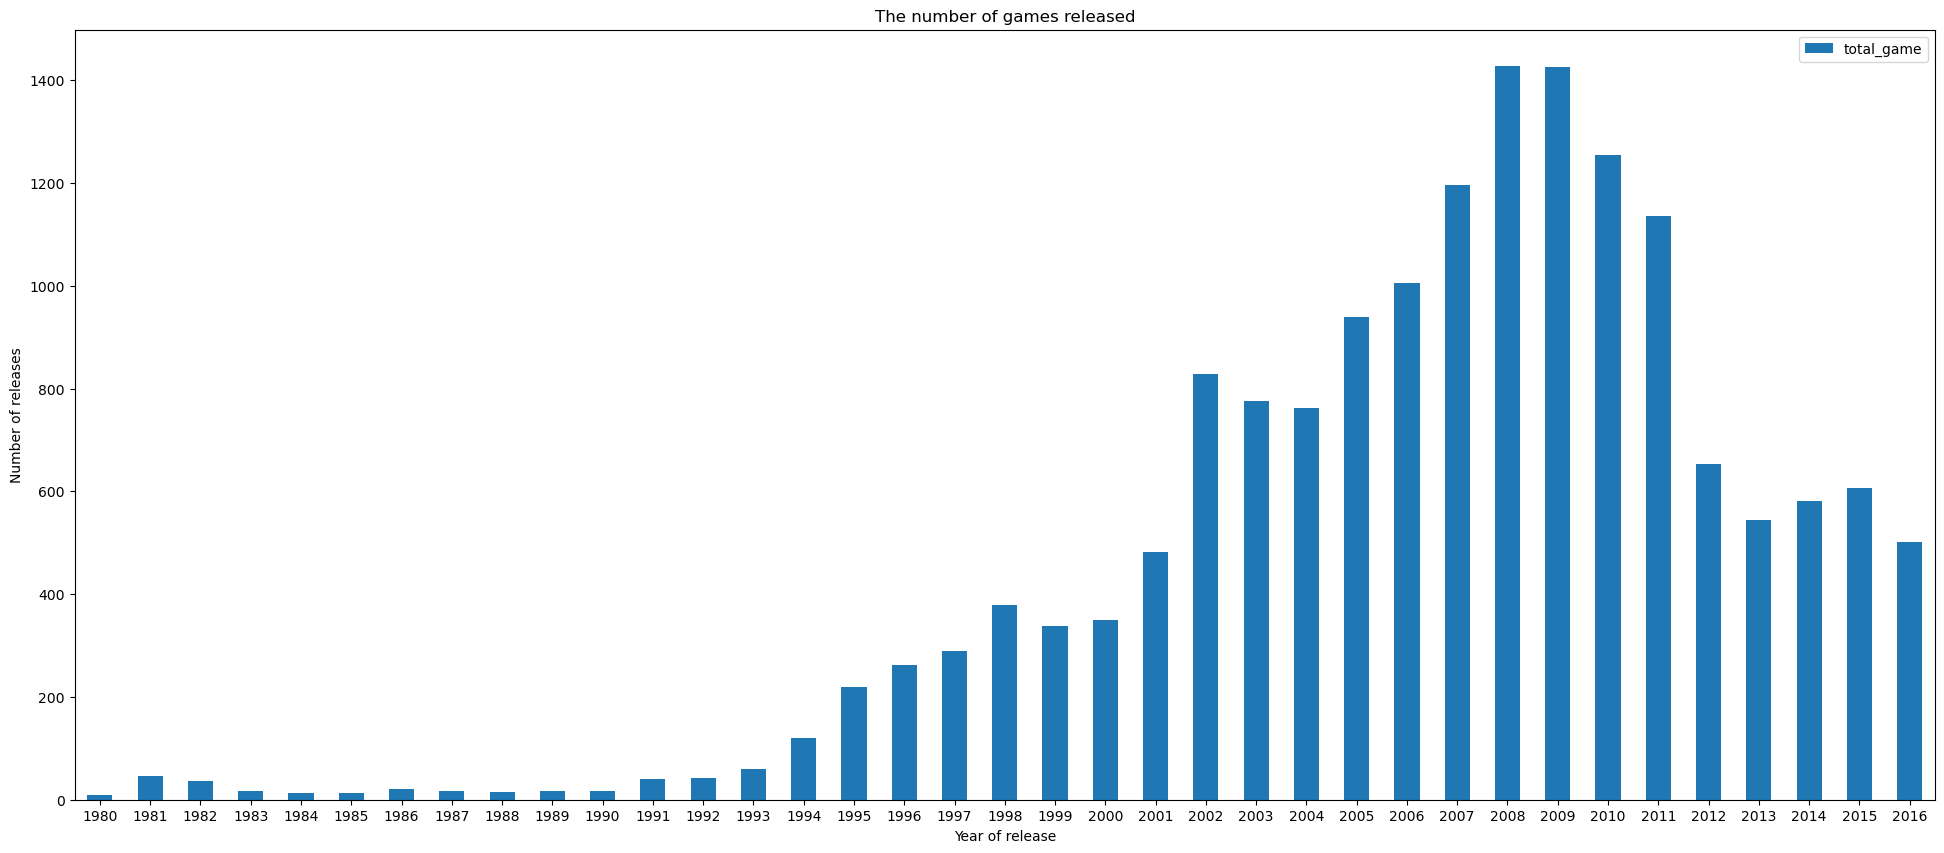

In [56]:
# Visualize pivot table
total_release.plot(kind='bar', figsize=(24, 10))

# Judul bar plot
plt.title("The number of games released")

# The name on the x,y-axis
plt.xlabel('Year of release')
plt.ylabel('Number of releases')

# Rotate x labels
plt.xticks(rotation=0)

# Displays the result
plt.show()

Between 1980 - 1994 the number of games released was not more than 200, starting from 1995 the number of games published was more, the peak occurred in 2008. However after that there was a decrease in the number of games published, and as seen in each period it was not significant changes occurred.

[Back to stages](#back)

### Variation of sales from platform to platform <a id="2"></a>

In [57]:
# Create a pivot table
total_platform = pd.pivot_table(df, index = ['platform'], values= 'total_sales', aggfunc = 'sum')

# Sort the values
total_platform = total_platform.sort_values(by='total_sales', ascending=False).reset_index()

# Check out the top 5
top_five = total_platform.head()
top_five

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78


ps2 is the platform with the most total sales, to analyze in more detail, the data above will be used.

In [58]:
# Function to display bar charts for each platform
'''
Definisi:
-----------
    Function to display bar charts for each platform
-----------
    data:
        datasets to be used
    pivots:
        desired pivots
    columns:
        column of the desired pivot
    index_pivot:
        index of the new pivot to be created
    values_pivots:
        values of the new pivot to be created
'''
def show_chart (data, pivot, columns, index_pivot, values_pivot):
    # Column with top 5 most sales
    cols = len(pivot)
    
    # Loop to create bar charts of each top platform
    for row in range(cols):
        
        # Fetch every platform
        each_platform = pivot[columns][row]
        
        # Filter the dataset for each platform
        x_slice = data.loc[data[columns] == each_platform]
        
        # Create a pivot table for each platform
        slice_pivot = pd.pivot_table(x_slice, index = [index_pivot], values= values_pivot, aggfunc = 'sum')
        
        # Bar charts
        slice_pivot.plot(kind='bar', figsize=(12, 5))
        
        # .format replaces the values contained in {} with the platform name
        plt.title('{} sales'.format(each_platform))
        
        # Naming x,y-axis
        plt.xlabel('Year of release')
        plt.ylabel('Number of releases')
        
        # Rotate the x labels
        plt.xticks(rotation=0)
    return plt.show()

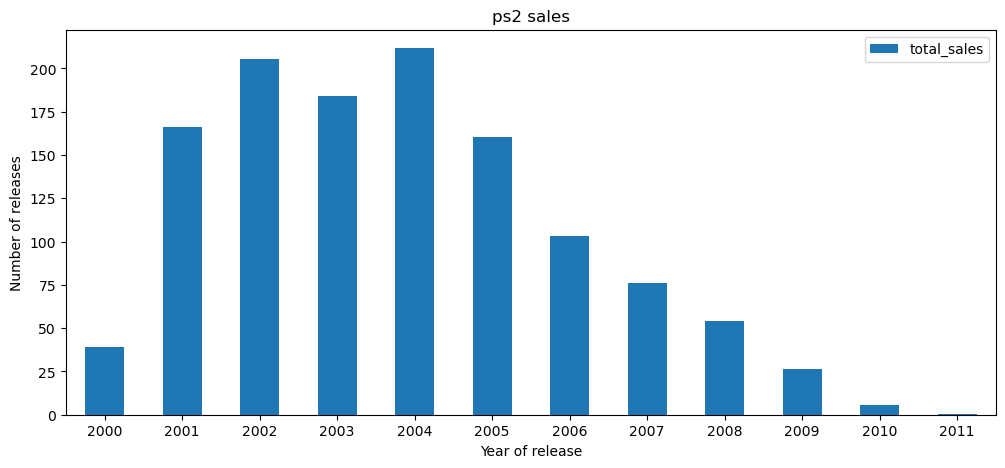

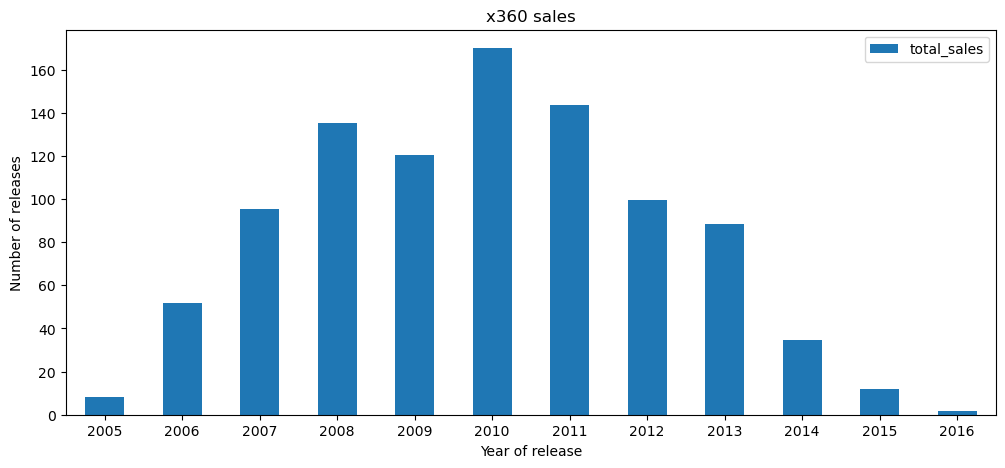

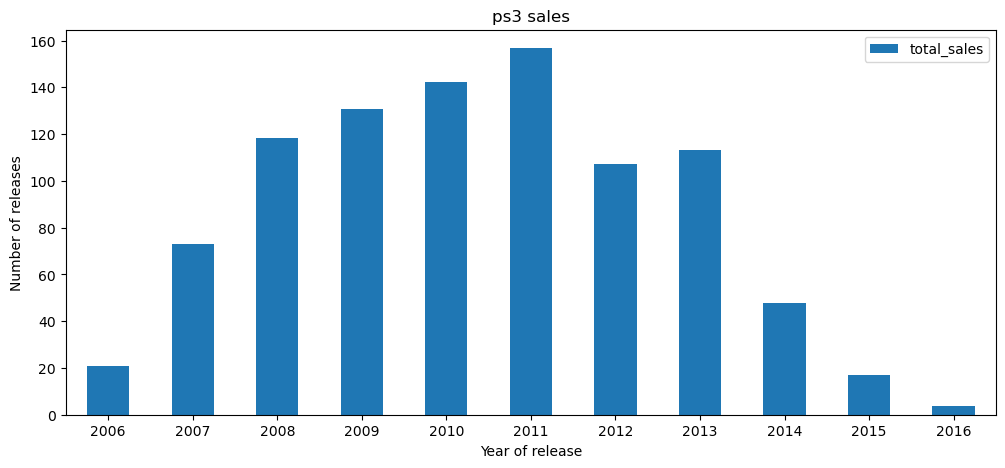

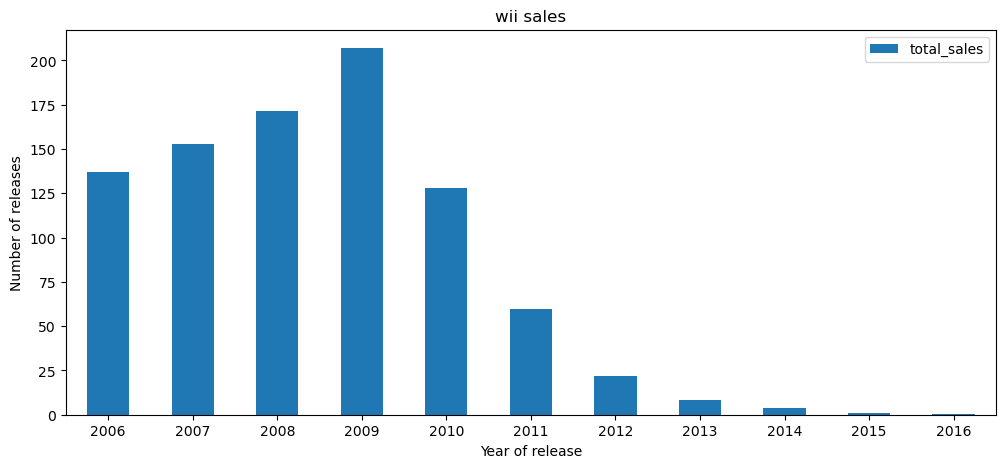

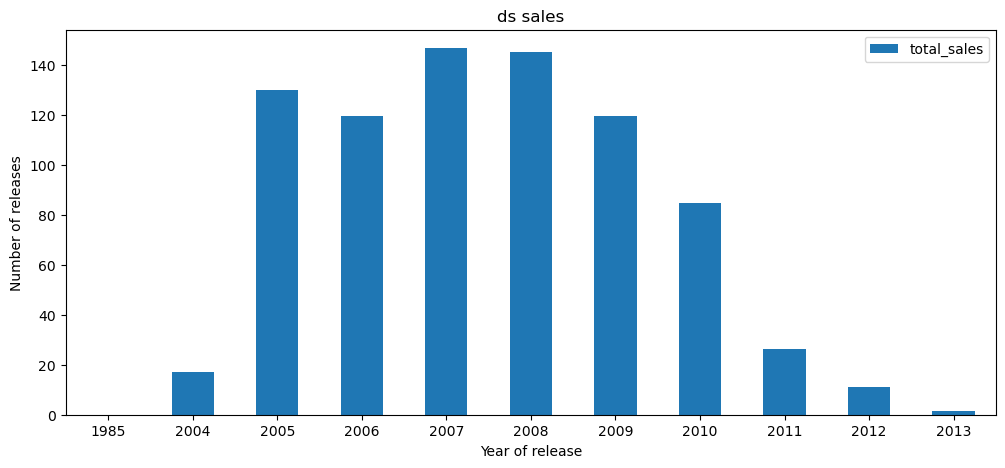

In [59]:
# Execute the function
show_chart (data = df, pivot=top_five , columns= 'platform', index_pivot= 'year_of_release', values_pivot= 'total_sales')

As you can see, PS2 is the platform that has the most total sales with 2004 being the peak of sales.

The Wii was popular for the first 3 years, but in 2016 it didn't have any sales.

The new ps2 platforms took 6 years to emerge, x360 and ps3 5 years, wii and ds 3 years while it took 7 years before those ps2 platforms faded, x360 and ds 6 years, ps3 5 years, wii 7 years.

So it takes about 3-5 years for a platform to appear, and it takes about 5-7 years for a platform to fade in popularity.

[Back to stages](#back)

### Sales per platform since 2013 <a id="3"></a>

In [60]:
# Filter data with years greater than or equal to 2006
df_new = df.loc[~(df['year_of_release']<2013)]

In [61]:
# Create a pivot table
total_platform_new = pd.pivot_table(df_new, index = ['platform'], values= 'total_sales', aggfunc = 'sum')

# Sort the values
total_platform_new = total_platform_new.sort_values(by='total_sales', ascending=False).reset_index()

# Checking the result
total_platform_new

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,39.43
7,psv,32.99
8,wii,13.66
9,psp,3.50


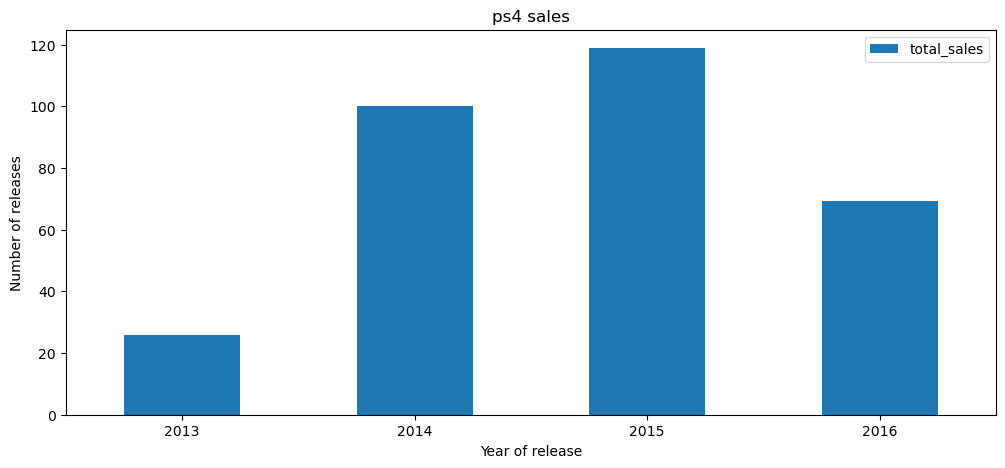

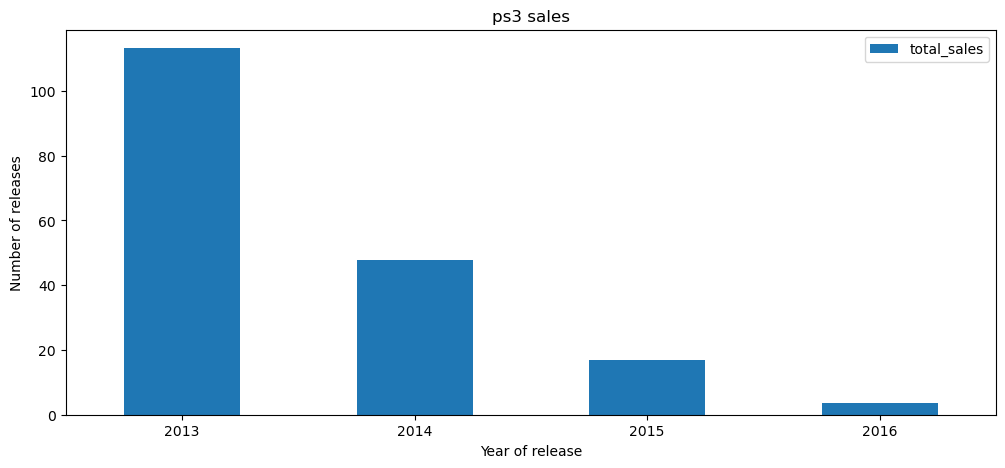

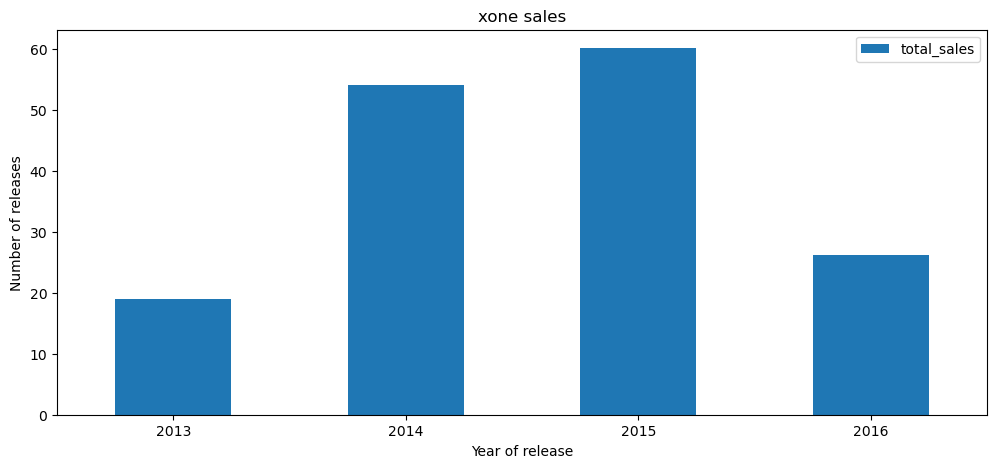

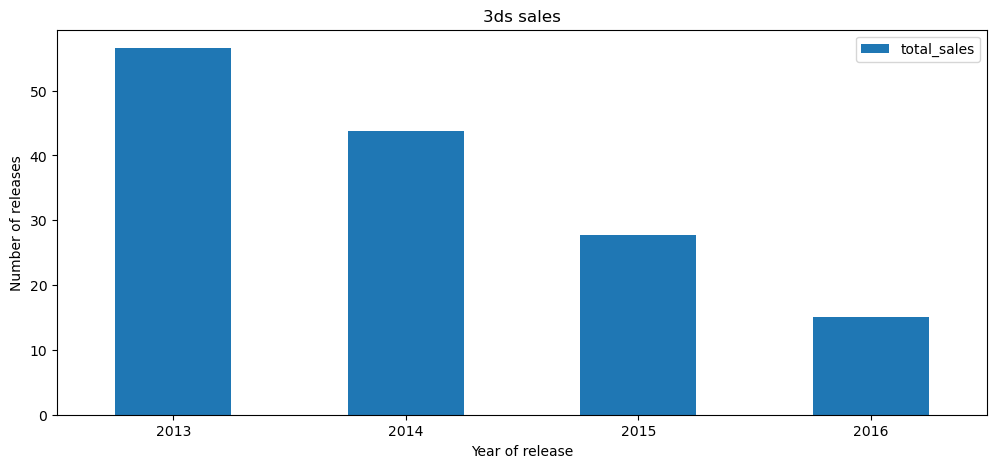

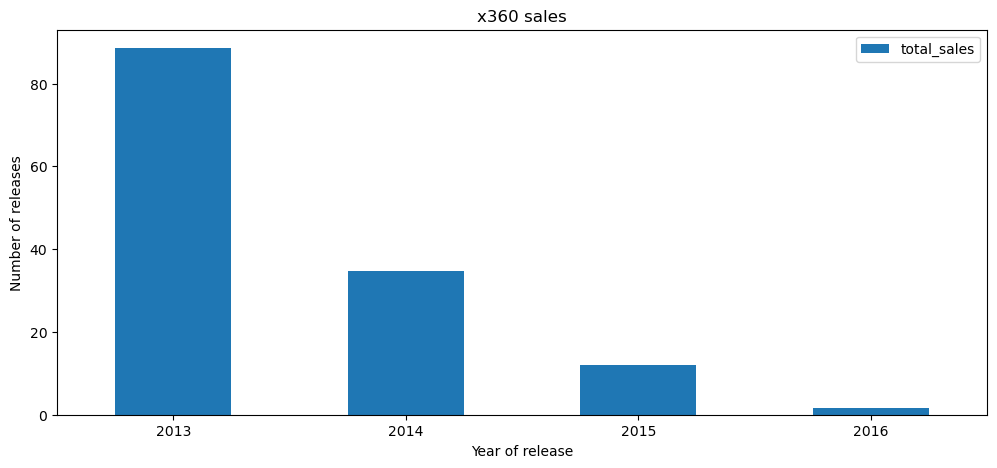

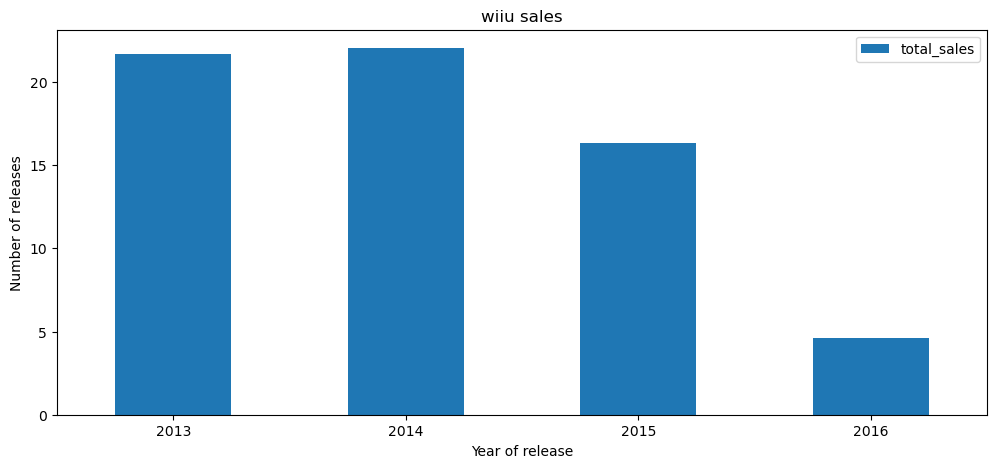

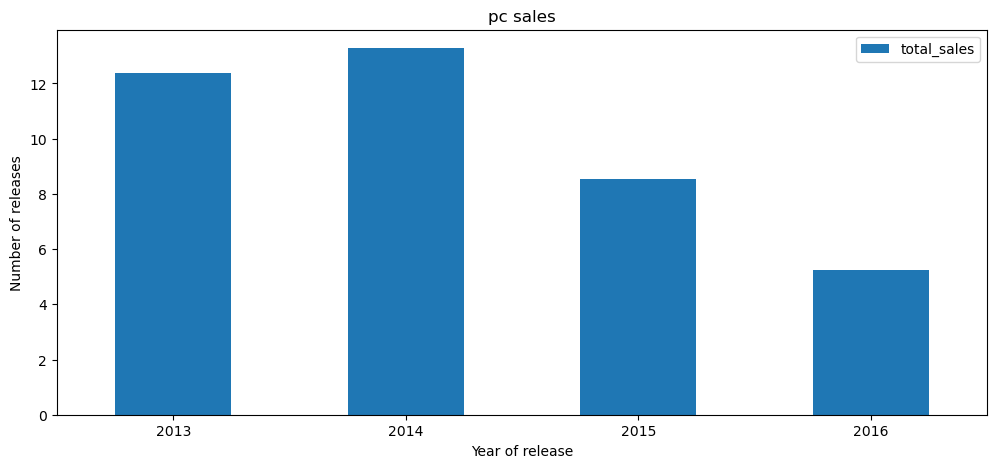

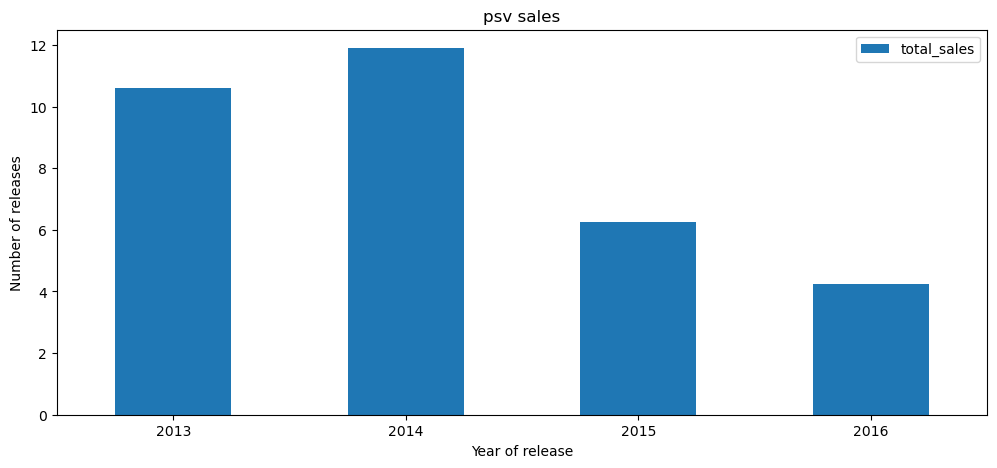

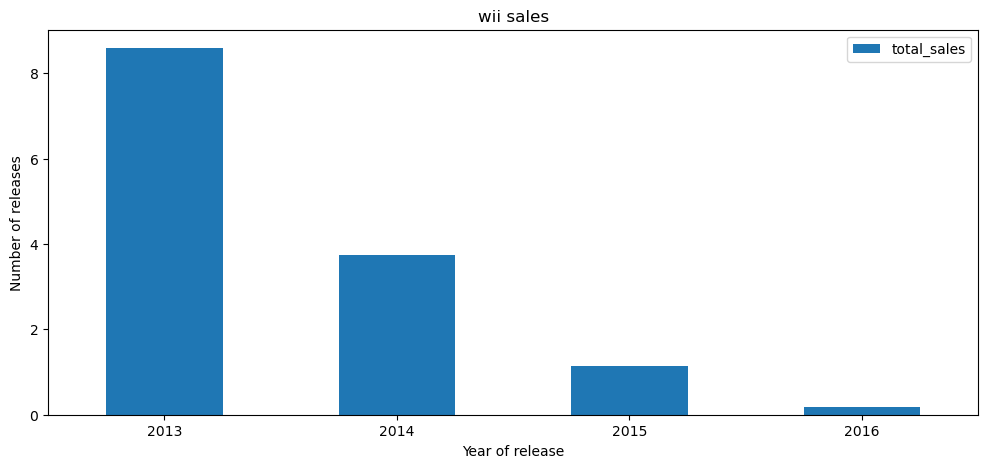

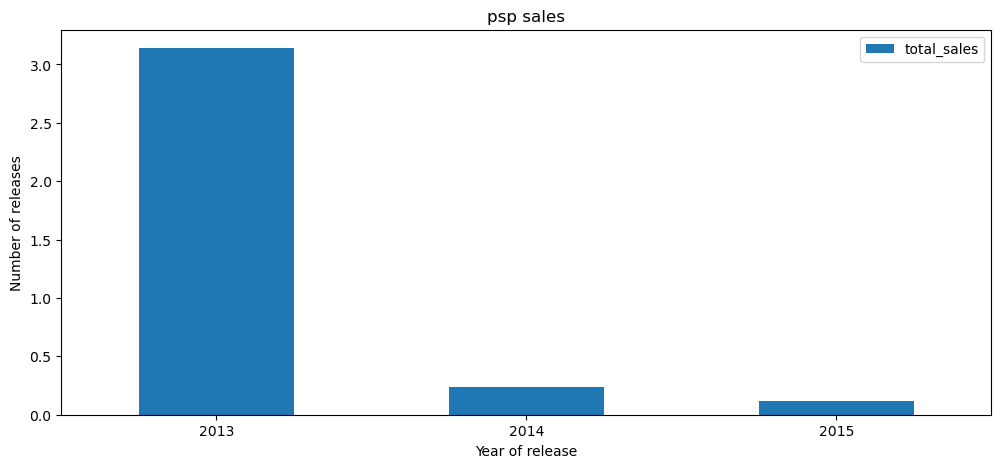

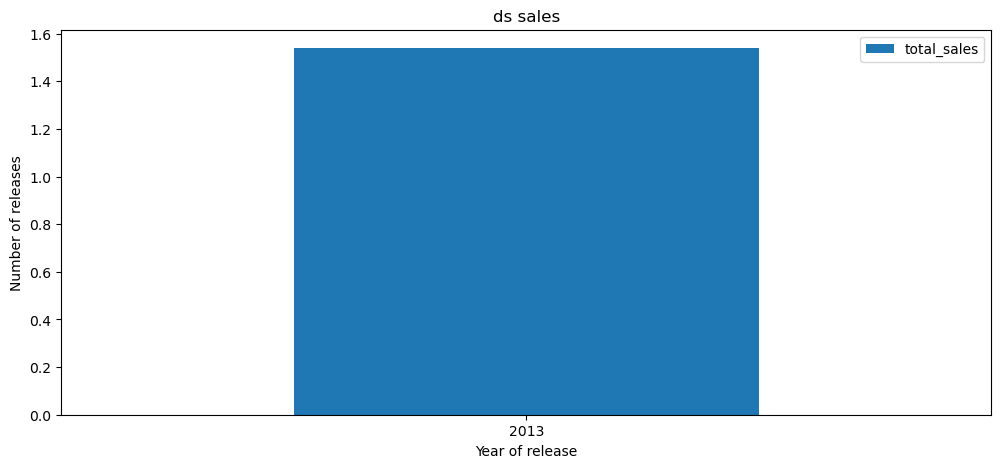

In [62]:
# Execute the function
show_chart (data= df_new, pivot=total_platform_new , columns= 'platform', index_pivot= 'year_of_release', values_pivot= 'total_sales')

Most sales are on the PS4 platform. The platforms that experienced growth were ps4 and xone, while those that experienced shrinkage were ps3, 3ds, x360, wiiu, pc, psv, wii, psp.

[Back to stages](#back)

### Profit potential on the platform <a id="4"></a>

For platforms that are experiencing growth, a reference can be used to find out the profit potential on the platform, except for the ds platform, which only received sales in 2013.

In [63]:
# Filter the required data
df_platform = df_new.loc[df_new['platform'].str.contains('ps4|xone|ps3|3ds', regex=True)]

In [64]:
# Create a pivot table
platform_pivot = pd.pivot_table(df_platform, index = ['platform'], values= 'total_sales', aggfunc = ['sum', 'mean', 'median'])

# Rename column
platform_pivot.columns = ['total_sales', 'mean', 'median']

# Sort values
platform_pivot = platform_pivot.sort_values(by='total_sales', ascending=False)

# Checking the result
platform_pivot

,total_sales,mean,median
platform,,,
ps4,314.14,0.801378,0.20
ps3,181.43,0.525884,0.15
xone,159.32,0.645020,0.22
3ds,143.25,0.472772,0.09


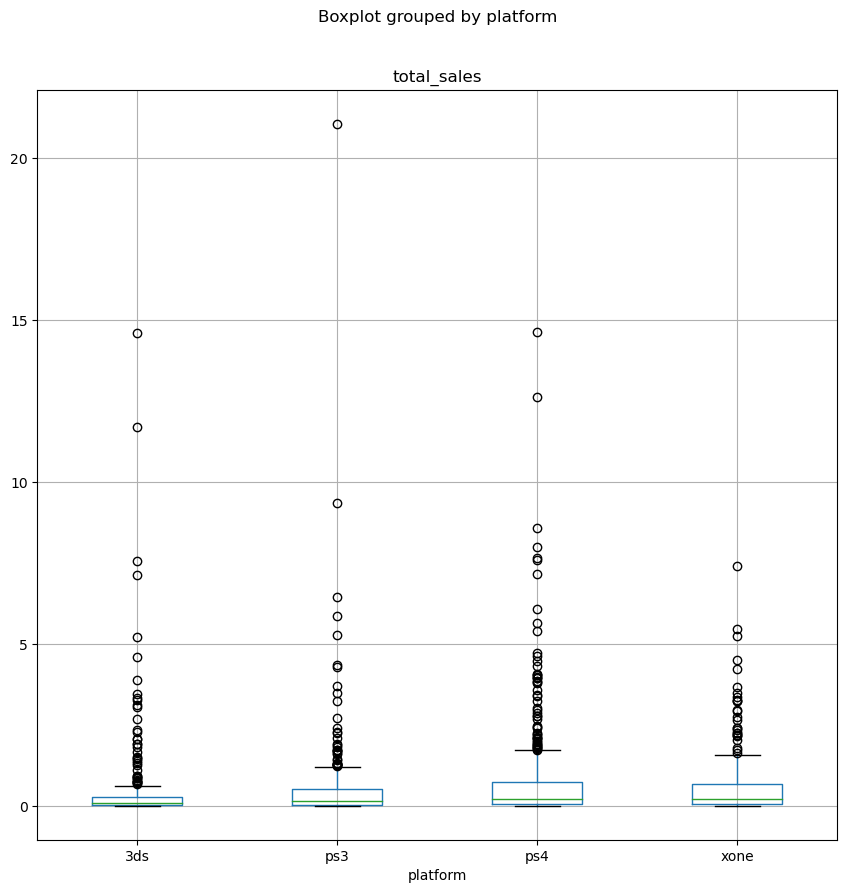

In [65]:
# Boxplot `total_sales` column
df_platform.boxplot(column='total_sales', by='platform', figsize=(10, 10))

# Displays the result
plt.show()

The median difference from the ps3, ps4, and xone platforms is not significant, while the 3ds platform has the smallest median of all platforms, the highest average sales are obtained from the ps4 platform, but there is no significant difference with the ps3 and xone, the least sales are obtained in 3ds platforms.

[Back to stages](#back)

### Influence of reviews on platform sales <a id="5"></a>

**For ps4 platforms**

In [66]:
# PS4 platforms filters
only_ps4 = df_new.loc[df_new['platform']=='ps4']

In [67]:
# Function to display the scatter plot for a platform
'''
Definition:
-----------
    Function to display the scatter plot for a platform
-----------
    data:
        datasets to be used
    title:
        the title of the scatter plot
'''
def correlation (data, title):
    # Review column
    which_cols=['critic_score', 'user_score']

    # Scatter plots
    for col_name in which_cols:
        
        # Plot charts
        data.plot(x=col_name, y='total_sales', kind='scatter')
        
        # Title
        plt.title('{}s vs total sales scatter plot'.format(col_name))
        
        # Sub-headings
        plt.suptitle(title)
    return plt.show()   

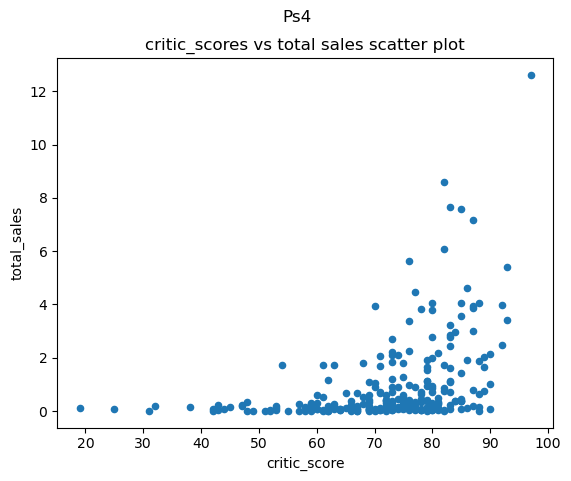

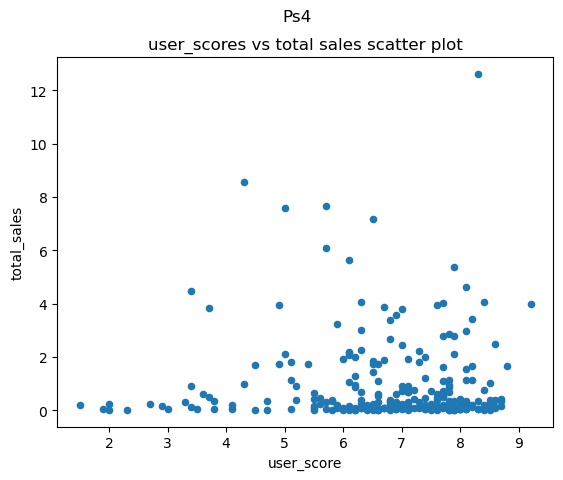

In [68]:
# Execute the function
correlation (data = only_ps4, title = 'Ps4')

**Pearson's correlation coefficient**, tells us how much one value changes when the other changes. These coefficients take values ​​from -1 to 1.

- If a value increases with other values, the Pearson correlation coefficient will show a positive number.
- If a value remains the same when another is changed, the coefficient is 0.
- If one of the values ​​decreases when the other increases, the coefficient is negative.

The closer the coefficient is to -1 or 1, the stronger the dependence. A value close to 0 indicates a weak connection, while a value of 0 indicates that there is no connection or that there is a complex non-linear connection that the coefficients cannot show.

In [69]:
# Correlation coefficient
print('Critic score vs Total sales:', only_ps4['critic_score'].corr(only_ps4['total_sales']))
print('User score vs Total sales:', only_ps4['user_score'].corr(only_ps4['total_sales']))

Critic score vs Total sales: 0.40656790206178095
User score vs Total sales: -0.031957110204556424


As can be seen there is a correlation between the critic score (reviews from critics) and total sales, and for the correlation between user score (reviews from users) and total sales it is not very significant, there is almost no correlation.

[Back to stages](#back)

**For ps3 platforms**

In [70]:
# PS3 platforms filters
only_ps3 = df_new.loc[df_new['platform']=='ps3']

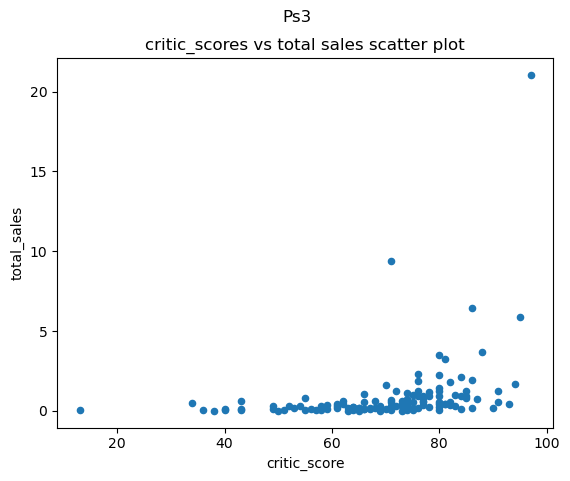

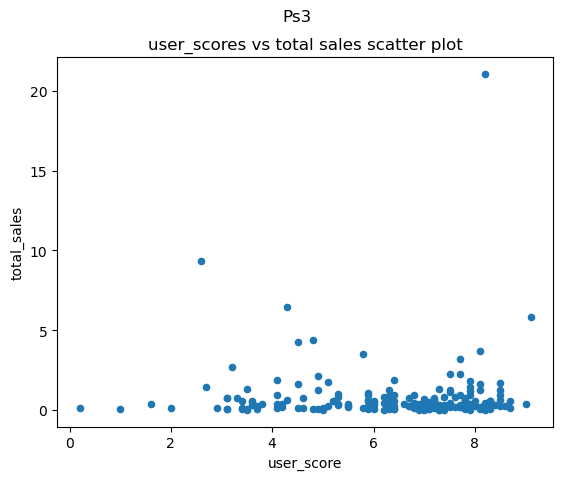

In [71]:
# Execute the function
correlation (data = only_ps3, title = 'Ps3')

In [72]:
# Correlation coefficient
print('Critic score vs Total sales:', only_ps3['critic_score'].corr(only_ps3['total_sales']))
print('User score vs Total sales:', only_ps3['user_score'].corr(only_ps3['total_sales']))

Critic score vs Total sales: 0.3342853393371919
User score vs Total sales: 0.0023944027357566925


As can be seen with the results which are more or less the same as the PS4, there is a correlation between the critical score (reviews from critics) and total sales, although not as high as the PS4 platform, and for the correlation between user scores (reviews from users) and total sales, it is not very significant or even almost non-existent. correlation.

[Back to stages](#back)

**For xbox-one platforms**

In [73]:
# Filter xone platforms
only_xone = df_new.loc[df_new['platform']=='xone']

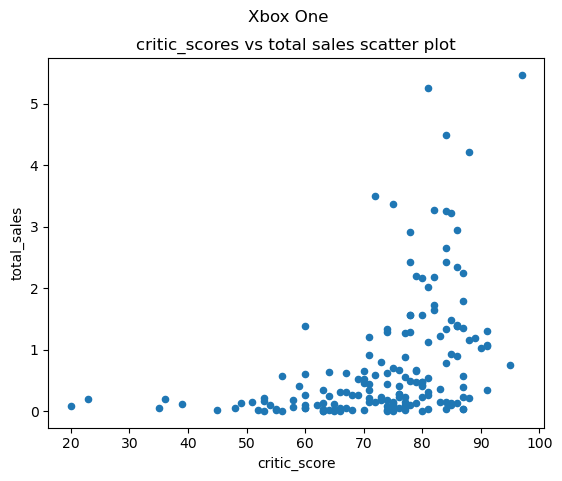

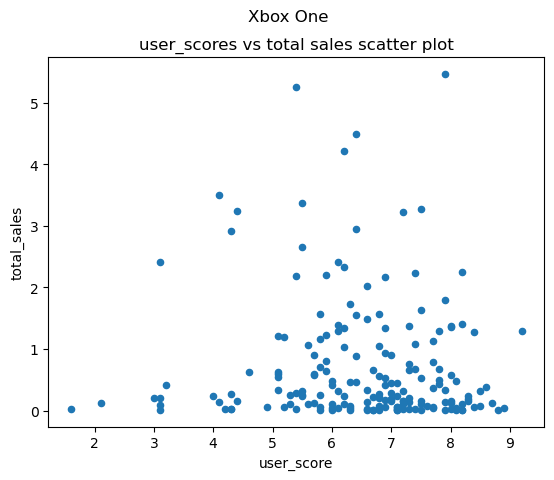

In [74]:
# Execute the function
correlation (data = only_xone, title = 'Xbox One')

In [75]:
# Correlation coefficient
print('Critic score vs Total sales:', only_xone['critic_score'].corr(only_xone['total_sales']))
print('User score vs Total sales:', only_xone['user_score'].corr(only_xone['total_sales']))

Critic score vs Total sales: 0.4169983280084017
User score vs Total sales: -0.06892505328279414


As can be seen, with more or less the same results as the PS4 and PS3, there is a correlation between the critical score (reviews from critics) and total sales, and for the correlation between user scores (reviews from users) and total sales, it is not very significant, there is almost no correlation.

[Back to stages](#back)

### Most profitable genre <a id="6"></a>

In [76]:
# Genre distribution
genre_dist = df_new['genre'].value_counts()

# Displays the result
genre_dist

action          766
role-playing    292
adventure       245
sports          214
shooter         187
misc            155
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: genre, dtype: int64

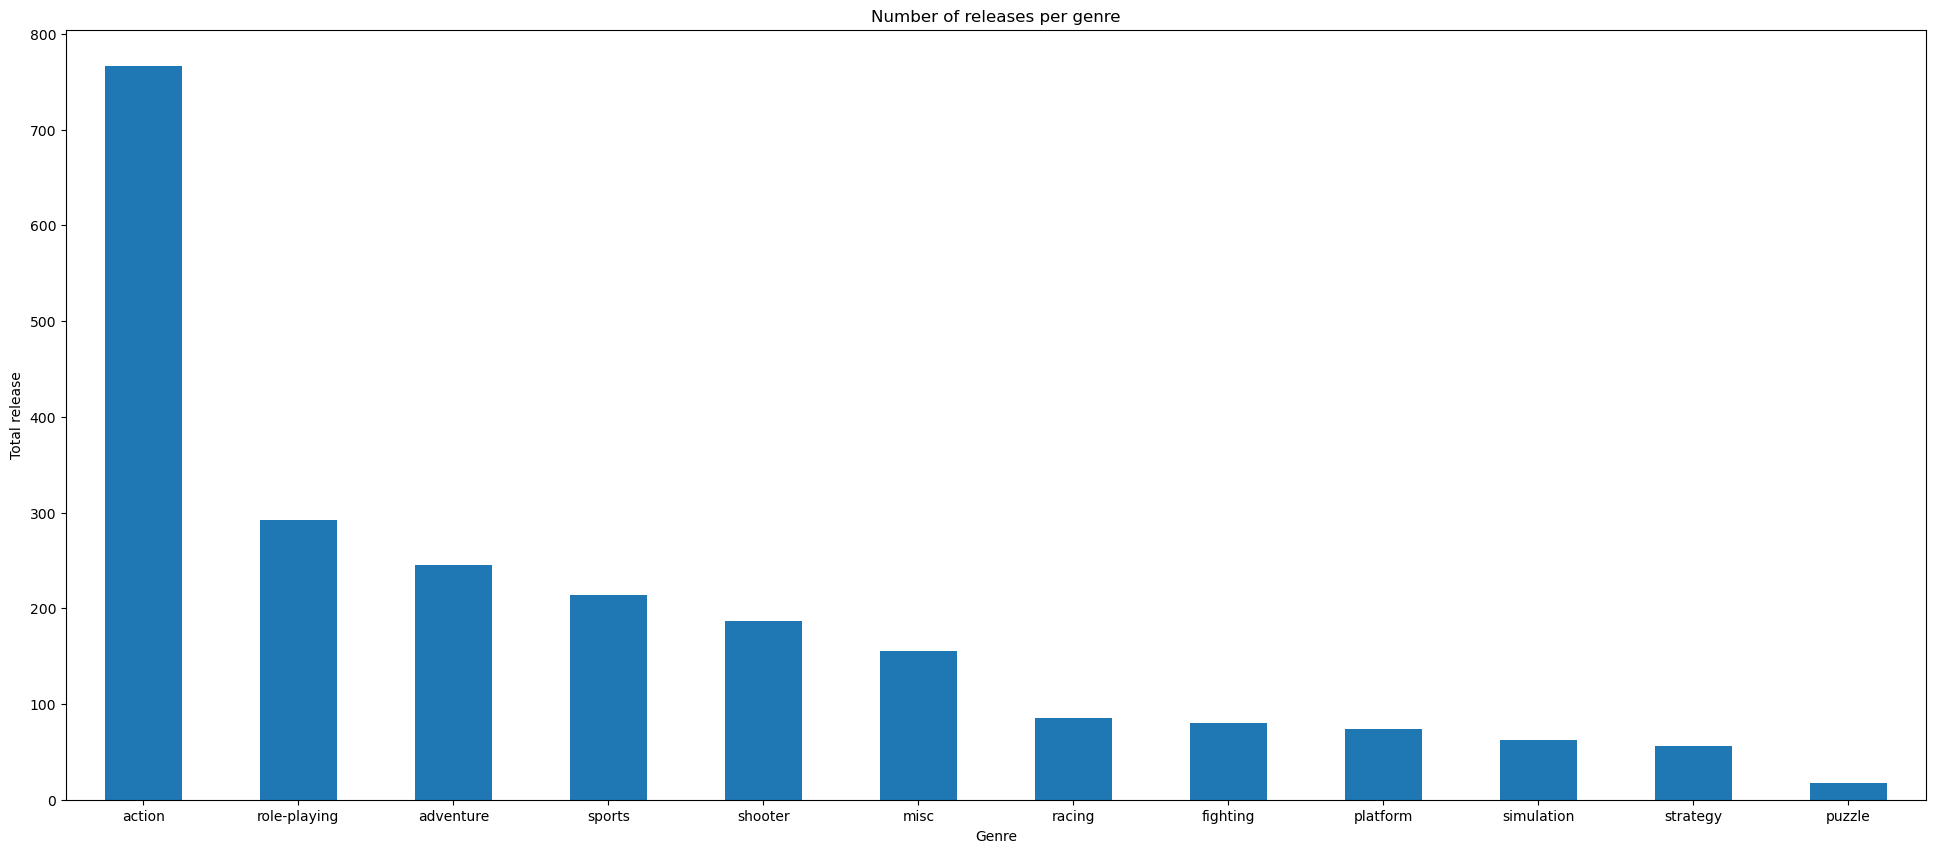

In [77]:
# Visualize the distribution of genres
genre_dist.plot(kind='bar', figsize=(24, 10))

# Title
plt.title("Number of releases per genre")

# Naming x,y-axis
plt.xlabel('Genre')
plt.ylabel('Total release')

# Rotate x labels
plt.xticks(rotation=0)

# Displays the result
plt.show()

The action genre is the most popular genre compared to other genres that have been released.

In [78]:
# Create a pivot table
genre_sales = pd.pivot_table(df, index = ['genre'], values= 'total_sales', aggfunc = 'sum')

# Sort the values
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

# Checking the result
genre_sales

,total_sales
genre,
action,1716.52
sports,1309.67
shooter,1041.36
role-playing,931.08
platform,825.55
misc,790.29
racing,723.49
fighting,442.66
simulation,387.96


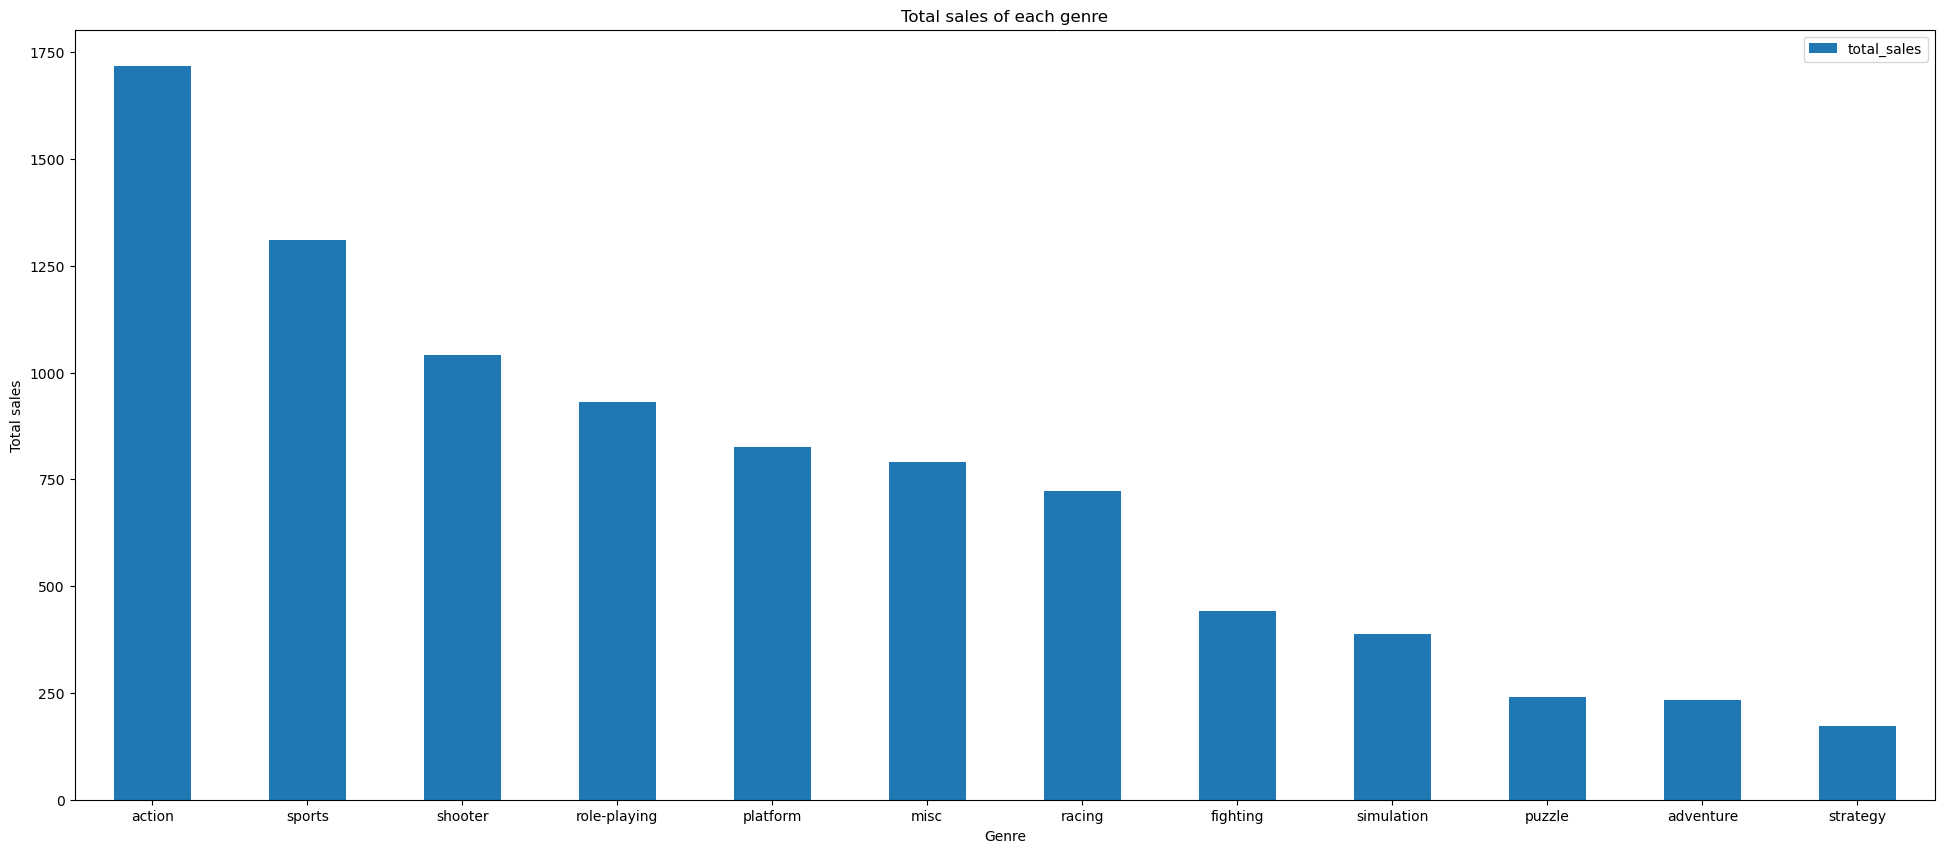

In [79]:
# Memvisualisasikan distribusi genre
genre_sales.plot(kind='bar', figsize=(24, 10))

# Title
plt.title("Total sales of each genre")

# Naming x,y-axis
plt.xlabel('Genre')
plt.ylabel('Total sales')

# Rotate x labels
plt.xticks(rotation=0)

# Displays the result
plt.show()

As seen not only being the most, the action genre also has the most total sales. The strategy genre is the genre with the fewest sales compared to other genres.

[Back to stages](#back)

### User profile of each area <a id="7"></a>

#### Platform

In [80]:
# Create a pivot table
user_na_platform = pd.pivot_table(df_new, index = 'platform', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_platform = pd.pivot_table(df_new, index = 'platform', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_platform = pd.pivot_table(df_new, index = 'platform', values= 'jp_sales', aggfunc = 'sum').reset_index()

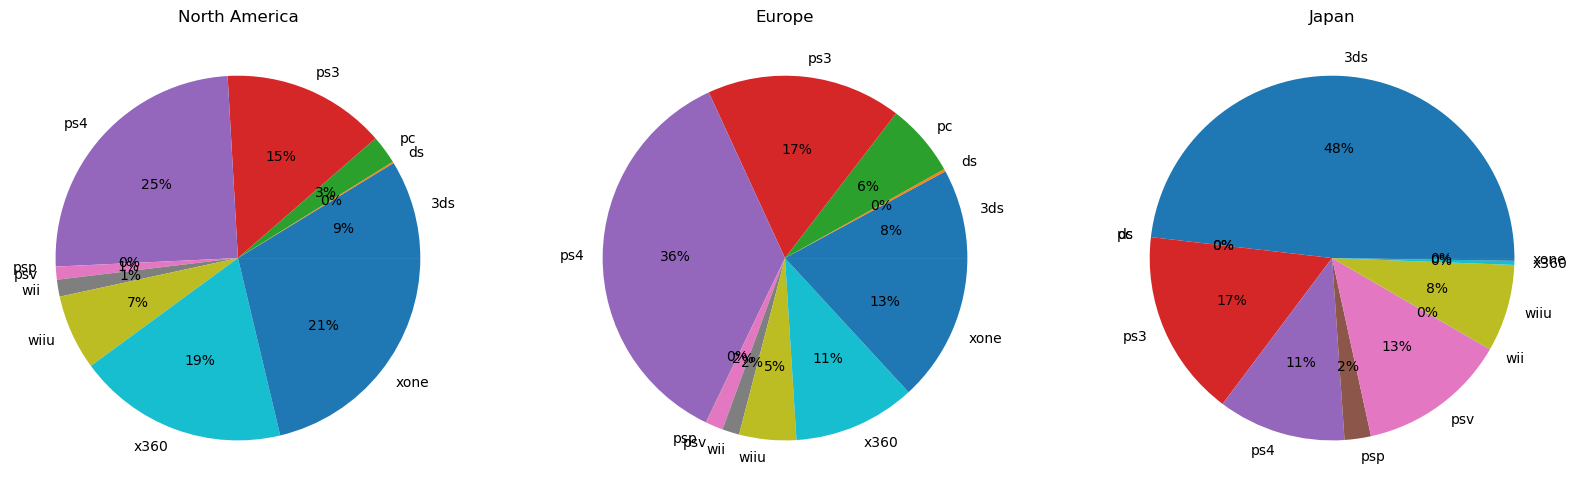

In [81]:
# Create pie charts
# 1 row 3 column
fig = plt.figure(figsize=(20,20))

# First row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_platform.na_sales, labels= user_na_platform['platform'], autopct='%1.0f%%')
plt.title('North America')

# First row, second column
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_platform.eu_sales, labels= user_eu_platform['platform'], autopct='%1.0f%%')
plt.title('Europe')

# First row, third column
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_platform.jp_sales, labels= user_jp_platform['platform'], autopct='%1.0f%%')
plt.title('Japan')

# Displays the result
plt.show()

In [82]:
# Sort each pivot table
na_top_platform = user_na_platform.sort_values(by='na_sales', ascending=False)
eu_top_platform = user_eu_platform.sort_values(by='eu_sales', ascending=False)
jp_top_platform = user_jp_platform.sort_values(by='jp_sales', ascending=False)

# Displays the result
print(na_top_platform.head())
print()
print(eu_top_platform.head())
print()
print(jp_top_platform.head())

   platform  na_sales
4       ps4    108.74
10     xone     93.12
9      x360     81.66
3       ps3     63.50
0       3ds     38.20

   platform  eu_sales
4       ps4    141.09
3       ps3     67.81
10     xone     51.59
9      x360     42.52
0       3ds     30.96

  platform  jp_sales
0      3ds     67.81
3      ps3     23.35
6      psv     18.59
4      ps4     15.96
8     wiiu     10.88


As seen in North America and Europe the ps4 is the most sold Xbox one is ranked 2nd, while in Japan 3ds enthusiasts are the most, and there is a ps4 in the top 5 platforms sold.

[Back to stages](#back)

#### Genre

In [83]:
# Create a pivot table
user_na_genre = pd.pivot_table(df_new, index = 'genre', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_genre = pd.pivot_table(df_new, index = 'genre', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_genre = pd.pivot_table(df_new, index = 'genre', values= 'jp_sales', aggfunc = 'sum').reset_index()

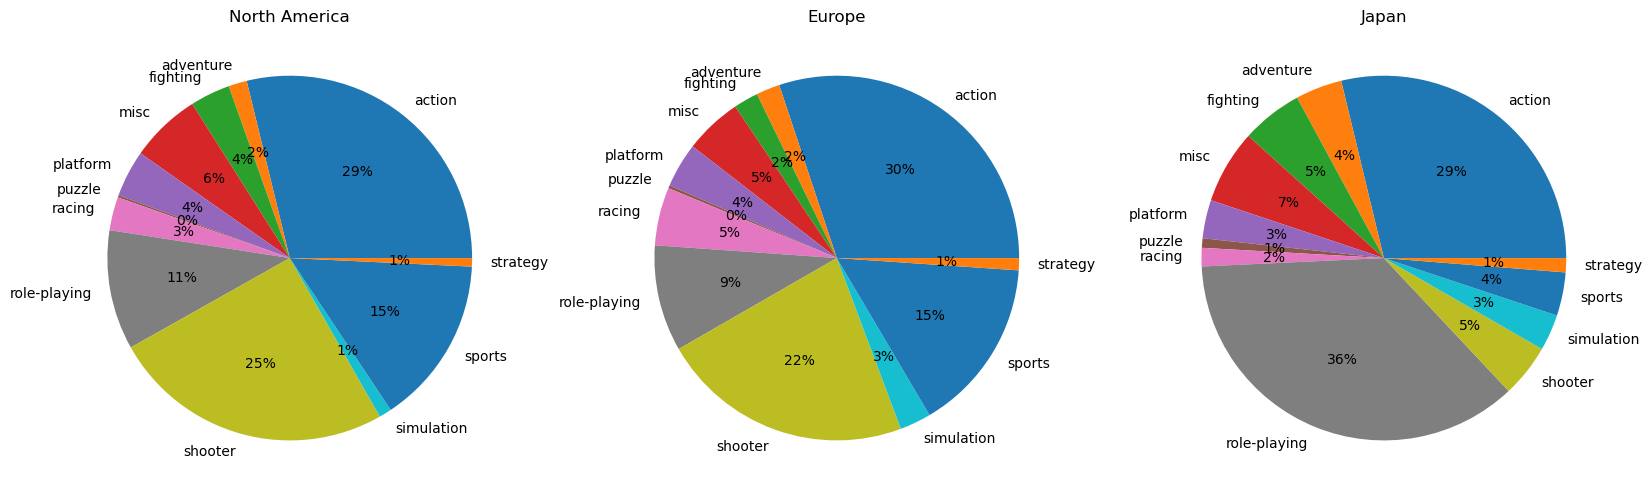

In [84]:
# Create pie charts
# 1 row 3 column
fig = plt.figure(figsize=(20,20))

# First row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_genre.na_sales, labels= user_na_genre['genre'], autopct='%1.0f%%')
plt.title('North America')

# First row, second column
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_genre.eu_sales, labels= user_eu_genre['genre'], autopct='%1.0f%%')
plt.title('Europe')

# First row, third column
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_genre.jp_sales, labels= user_jp_genre['genre'], autopct='%1.0f%%')
plt.title('Japan')

# Displays the result
plt.show()

In [85]:
# Sort each pivot table
na_top_genre = user_na_genre.sort_values(by='na_sales', ascending=False)
eu_top_genre = user_eu_genre.sort_values(by='eu_sales', ascending=False)
jp_top_genre = user_jp_genre.sort_values(by='jp_sales', ascending=False)

# Displays the result
print(na_top_genre.head())
print()
print(eu_top_genre.head())
print()
print(jp_top_genre.head())

           genre  na_sales
0         action    126.05
8        shooter    109.74
10        sports     65.27
7   role-playing     46.40
3           misc     27.49

           genre  eu_sales
0         action    118.13
8        shooter     87.86
10        sports     60.52
7   role-playing     36.97
6         racing     20.19

          genre  jp_sales
7  role-playing     51.04
0        action     40.49
3          misc      9.20
2      fighting      7.65
8       shooter      6.61


As seen in both North America and Europe the action genre is the most sold, while in Japan the role-playing genre is the most, followed by the action genre.

[Back to stages](#back)

#### Rating

In [86]:
# Create a pivot table 
user_na_rating = pd.pivot_table(df_new, index = 'rating', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_rating = pd.pivot_table(df_new, index = 'rating', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_rating = pd.pivot_table(df_new, index = 'rating', values= 'jp_sales', aggfunc = 'sum').reset_index()

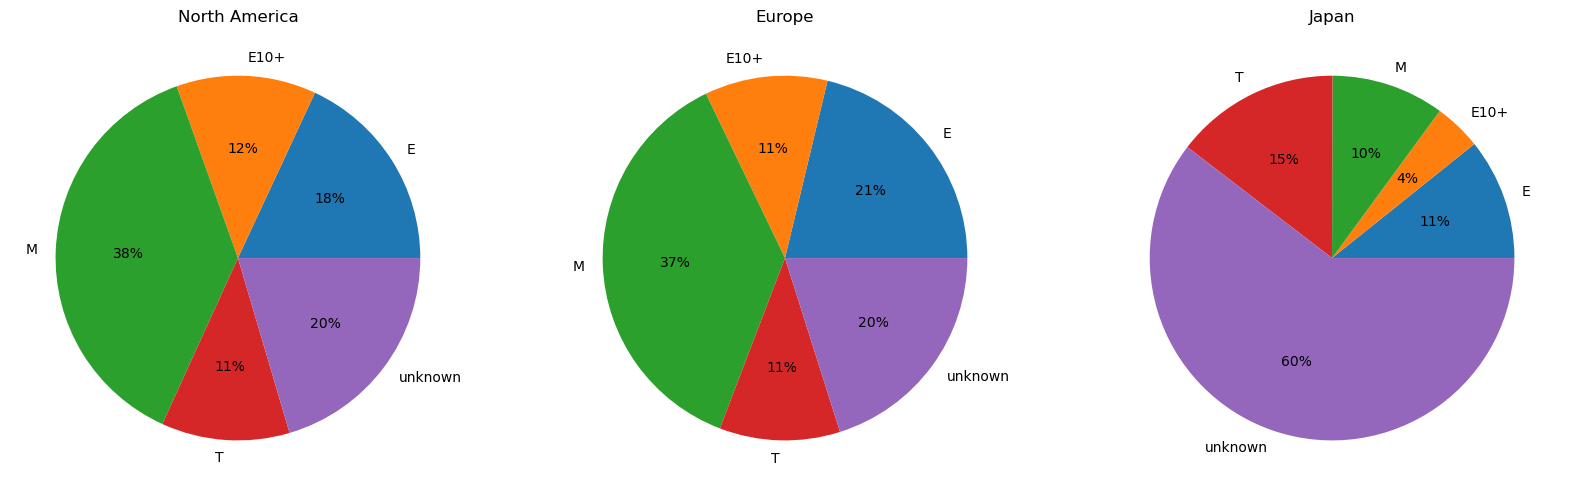

In [87]:
# Create pie charts
# 1 row 3 column
fig = plt.figure(figsize=(20,20))

# First row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_rating.na_sales, labels= user_na_rating['rating'], autopct='%1.0f%%')
plt.title('North America')

# First row, second column
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_rating.eu_sales, labels= user_eu_rating['rating'], autopct='%1.0f%%')
plt.title('Europe')

# First row, third column
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_rating.jp_sales, labels= user_jp_rating['rating'], autopct='%1.0f%%')
plt.title('Japan')

# Displays the result
plt.show()

In [88]:
# Sort each pivot table
na_top_rating = user_na_rating.sort_values(by='na_sales', ascending=False)
eu_top_rating = user_eu_rating.sort_values(by='eu_sales', ascending=False)
jp_top_rating = user_jp_rating.sort_values(by='jp_sales', ascending=False)

# Displays the result
print(na_top_rating.head())
print()
print(eu_top_rating.head())
print()
print(jp_top_rating.head())

    rating  na_sales
2        M    165.21
4  unknown     89.42
0        E     79.05
1     E10+     54.24
3        T     49.79

    rating  eu_sales
2        M    145.32
0        E     83.36
4  unknown     78.91
1     E10+     42.69
3        T     41.95

    rating  jp_sales
4  unknown     85.05
3        T     20.59
0        E     15.14
2        M     14.11
1     E10+      5.89


As seen in both North America and Europe the M (Mature) rating is the most sold, while in Japan the unknown rating is the most, followed by the T (Teen) rating.

[Back to stages](#back)

## Hypothesis Test <a id="Test"></a>

In [89]:
# Checking for missing values
df_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating                0
total_sales           0
dtype: int64

In [90]:
# Filter missing values
df_clean = df_new.dropna()

In [91]:
# Checking for missing values
df_clean.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

The hypothesis test this time will use a t-test where the sample is to test the difference between the two variables.

there are several types of T-test, such as *one sample t-test, independent sample t-test, and paired sample t-test*, and for now the one that will be used is *Independent sample t-test* because the samples to be tested have differences.

The T-test itself has a value *p-value* or the probability of occurrence of the value and also *alpha* or the error limit used.

So, if the p-value is less than alpha, then we can conclude that the evidence is strong enough to reject the null hypothesis (H0) and accept the alternative hypothesis (H1). Meanwhile, if the p-value is greater than alpha, then we fail to reject the null hypothesis (H0) and cannot draw any conclusions about the alternative hypothesis (H1).

### Average user rating for Xbox One and PC platforms <a id="h1"></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: The average user rating for the Xbox One and PC platforms is the same.
2. H1: The average user rating for the Xbox One and PC platforms is not the same.

If H0 defines the average user rating of Xbox One and PC platforms as 'same', then H1 will define the opposite of H0, will define that the average user rating of Xbox One and PC platforms is 'not the same'.

For now the alpha used is 5%, why not 1%, or 10%?, Because 5% is a balanced number to avoid type-I errors, or type-II errors.

Type-I error supports the alternative hypothesis (H1) when the null hypothesis (H0) is true, while type-II error does not support the null hypothesis (H0) when the alternative hypothesis (H1) is true.

In [92]:
# Data filters
xone_only = df_clean.loc[df_new['platform'] == 'xone']
pc_only = df_clean.loc[df_new['platform'] == 'pc']

In [93]:
# xone variance
np.var(xone_only['user_score'])

1.7855118457300287

In [94]:
# pc variance
np.var(pc_only['user_score'])

2.9126310262965673

In [95]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(xone_only['user_score'], pc_only['user_score'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 0.17882648263401307
We cannot ignore the null hypothesis


As explained above, because the p-value is greater than alpha, the null hypothesis cannot be ignored, which means that the average user rating for the Xbox One and PC platforms is the same.

[Back to stages](#back)

### Average user rating for Action and Sports genre <a id="h2"></a>

As with the hypothesis test above, before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: The average user rating for the Action and Sports genres is the same.
2. H1: The average user rating for the Action and Sports genres is not the same.

If H0 defines the average user rating of the Action and Sports genres as 'not the same', then H1 will define the opposite of H0, will define that the average user rating of the Action and Sports genres is 'same'.

In [96]:
# Data filters
action_only = df_clean.loc[df_new['genre'] == 'action']
sports_only = df_clean.loc[df_new['genre'] == 'sports']

In [97]:
# Action variance
np.var(action_only['user_score'])

1.6408868780176133

In [98]:
# Sports variance
np.var(sports_only['user_score'])

2.1122611570247933

In [99]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(sports_only['user_score'], action_only['user_score'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 1.0496920005008588e-13
We reject the null hypothesis


As explained above, because the value of *p-value* is smaller than *alpha* the null hypothesis is rejected, which means that the average rating of users of the Action and Sports genres is different.

---

In [100]:
# Dataset size changes
100 - (((df.shape[0] - df_new.shape[0])/df.shape[0])*100)

13.579421065434204

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

General conclusions that can be drawn:

1. At the beginning, the dataset has been checked and there are a number of things that need to be corrected, such as column names in the dataset that have been changed to small, *missing values* in several columns that are corrected according to their conditions, and changing the data type in each column that needs to be changed.

2. When doing *exploratory data analysis* many questions have been analyzed to find the answers:
    - There is no significant change in the number of games released in different years, the peak occurred in 2008
    - Sales vary from one platform to another, accounting for around 3-5 years for a platform to appear, and taking around 5-7 years for a platform to fade in popularity.
    
    - Sales per platform since 2006, most sales are on ps4 platforms. The platforms that experienced growth were ps4, xone while those that experienced shrinkage were ps3, 3ds, x360, wiiu, pc, psv, wii, psp.
    
    - Profit potential on the platform, the highest average sales were obtained on the ps4 platform, but there is no significant difference with the ps3 and xone, which had the least sales on the 3ds platform.
    
    - The effect of reviews on platform sales, for Ps4, PS3, and Xbox One there is a correlation between reviews from critics and total sales, and for the correlation between user scores, reviews from users and total sales is not very significant, there is almost no correlation.
    
    - The most profitable genre, the action genre being the most published genre, also has the highest total sales. While the least compared to the others is in the strategy genre.
    
    - User profiles for each region,
        - In North America and Europe, PS4 is the top 5 selling platforms, Xbox One is in 2nd place, while in Japan, 3ds enthusiasts are the most, and PS4 is in the top 5 selling platforms.
        - For genres in North America or Europe the action genre is the most sold, while in Japan the role-playing genre is the most, followed by the action genre.
        - Rating in North America or Europe rating M (Mature) is the most sold, while in Japan rating unknown is the most, followed by rating T (Teen).
    
3. For the hypothesis, there are 2 that have been analyzed:
    - The average user rating for the Xbox One and PC platforms is the same, because the p-value is greater than alpha, the null hypothesis cannot be ignored. In other words, the results of the statistical test are statistically the same.
    - The average user rating for the Action and Sports genres is different, because the p-value is smaller than alpha, the null hypothesis is rejected. In other words, the statistical test results are statistically significant.

[Back to stages](#back)